# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

In [2]:
# leer conjuntos de datos en los DataFrames

instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', ';')

instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
products = pd.read_csv('/datasets/products.csv', sep=';')

products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')

departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [7]:
# mostrar información del DataFrame

instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [8]:
# mostrar información del DataFrame

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
# mostrar información del DataFrame

aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
# mostrar información del DataFrame

departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
# mostrar información del DataFrame

order_products.info()
print()
print(order_products.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

         order_id  product_id  add_to_cart_order  reordered
0           False       False              False      False
1           False       False              False      False
2           False       False              False      False
3           False       False              False      False
4           False       False              False      False
...           ...         ...                ...        ...
4545002     False       False              False      False
4545003     False       False              False      False
4545004     False       False              False      False
4545005     False       False              

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


<div class="alert alert-block alert-info">

-instacart_orders: tiene valores ausentes, además algunos tipos de datos no son los indicados para la información que contiene, por ejemplo: days_since_prior_order, donde está en float y no en números enteros. 
    
-products: tiene valores ausentes en el nombre de los productos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

<div class="alert alert-block alert-info">

Es muy posible que estos valores duplicados existan por órdenes que no se procesaron, nombres de productos repetidos, o que fueron escritos de manera diferente pero hacen referencia al mismo producto. 

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

<div class="alert alert-block alert-info">

1. Revisar si hay valores duplicados y eliminarlos.
2. Revisar los valores ausentes y eliminarlos.
3. Verificar y corregir los tipos de datos. 
    

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [12]:
# Revisa si hay pedidos duplicados
print(f' cantidad de pedidos duplicados: {instacart_orders.duplicated().sum()}')
instacart_orders[instacart_orders.duplicated()]

 cantidad de pedidos duplicados: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [13]:
instacart_orders = instacart_orders.astype('Int64')
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478967 non-null  Int64
 1   user_id                 478967 non-null  Int64
 2   order_number            478967 non-null  Int64
 3   order_dow               478967 non-null  Int64
 4   order_hour_of_day       478967 non-null  Int64
 5   days_since_prior_order  450148 non-null  Int64
dtypes: Int64(6)
memory usage: 24.7 MB


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
<div class="alert alert-block alert-info">
    Todos los pedidos duplicados están registrados el miércoles a las 2.

In [14]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(instacart_orders.query("order_dow == 3 and order_hour_of_day == 2"))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                        16  
5156                        11  
15506                   

¿Qué sugiere este resultado?

<div class="alert alert-block alert-info">
    Si bien 106 pedidos no es una muestra significativa, el hecho de que haya más pedidos, que no están duplicados a esta hora y este día sugiere que no es trata de un error del sistema, si no más bien un caso aislado que puede arreglarse eliminando los valores repetidos. 

In [15]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates().reset_index(drop = True)

In [16]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum())

0


In [17]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
instacart_orders.duplicated(subset = 'order_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

<div class="alert alert-block alert-info">
Se encontraron varios valores duplicados con características en común, se analizó que eliminarlos no afectara la base de datos y resultados, se eliminaron los valores duplicados. 

### `products` data frame

In [18]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [19]:
# Verifica únicamente si hay IDs duplicadas de productos
products.duplicated(subset = 'product_id').sum()

0

In [20]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(f' cantidad de nombres de productos duplicados: {products.duplicated(subset = "product_name").sum()}')
products[products.duplicated(subset = 'product_name')]

 cantidad de nombres de productos duplicados: 1361


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [21]:
# Revisa si hay nombres duplicados de productos no faltantes
products[~(products['product_name'].isna()) & (products['product_name'].duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">
En este Dataframe no había valores duplicados, así que solo me cercioré de ello. Cambié los nombres de los productos a mayúsculas para facilitar la revisión y volví a revisar que no hubiera duplicados. 

Durante este último proceso, pude encontrar que habían varios nombres con valores ausentes que más adelante deberán tratarse. 

### `departments` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [23]:
# Revisa únicamente si hay IDs duplicadas de productos
departments[departments.duplicated(subset = 'department_id')]

,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">
En este apartado me cercioré de que no hubiera ningún valor duplicado en el dataframe de department. Efectivamente, no hay ninguno en esta base de datos. 

### `aisles` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [25]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles[aisles.duplicated(subset = 'aisle_id')]

,aisle_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">
En este apartado me cercioré de que no hubiera ningún valor duplicado en el dataframe de aisle. Efectivamente, no hay ninguno en esta base de datos. 

### `order_products` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [27]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[order_products.duplicated(subset = ['order_id', 'product_id'])]

,order_id,product_id,add_to_cart_order,reordered


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">
En este apartado me cercioré de que no hubiera ningún valor duplicado en el dataframe de Order Products. Efectivamente, no hay ninguno en esta base de datos. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [28]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products['product_name'].isna().sum())
print()
products[products['product_name'].isna()]

1258



,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">
En el dataframe Products encontré más de mil valores ausentes, es decir, de nombres de productos cuyos nombres no tenemos registrados. Además, tan solo en lo visualizado, se puede ver que todos estos valores ausentes se encuentran del pasillo 100 y del departamento número 21.

In [29]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">

Según lo observado, todos los valores ausentes de este dataframe están vinculados al pasillo con ID 100.

In [30]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">

Según lo observado, todos los valores ausentes de este dataframe están vinculados al departamento con ID 21.

In [31]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(departments[departments['department_id'] == 21]['department'])
display(aisles[aisles['aisle_id'] == 100]['aisle'])


20    missing
Name: department, dtype: object

99    missing
Name: aisle, dtype: object

Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">
    
Con los resultados anteriores se puede observar que de los valores ausentes, hay más relacionados con el pasillo 100 que con el departamento 21.

In [32]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">
    
Lo primero fue identificar los valores ausentes en los nombres de los productos y reemplazar estos por un nuevo nombre que englobara todos los valores ausentes. 

### `orders` data frame

In [33]:
# Encuentra los valores ausentes
print(instacart_orders.isna().sum())
print()
instacart_orders[instacart_orders['days_since_prior_order'].isna()]

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,<NA>
96,787445,25685,1,6,18,<NA>
100,294410,111449,1,0,19,<NA>
103,2869915,123958,1,4,16,<NA>
104,2521921,42286,1,3,18,<NA>
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,<NA>
478881,2222353,141211,1,2,13,<NA>
478907,2272807,204154,1,1,15,<NA>
478911,2499542,68810,1,4,19,<NA>


In [34]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
instacart_orders[(instacart_orders['days_since_prior_order'].isna()) & (instacart_orders['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">

Los resultados nos muestran que todos los valores ausentes de este dataframe se encuentran en days since prior order, pero al comparar si en todos los casos se trataba de que el cliente solo había pedido una vez en la plataforma, nos damos cuenta de que en efecto, el valor ausente se debe a que no se ha vuelto a hacer pedidos desde esa primera vez. 

### `order_products` data frame

In [35]:
# Encuentra los valores ausentes
print(order_products.isna().sum())
print()
order_products[order_products['add_to_cart_order'].isna()]

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64



,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [36]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f' el valor mínimo es: {order_products["add_to_cart_order"].min()}')
print()
print(f' el valor máximo es: {order_products["add_to_cart_order"].max()}')

 el valor mínimo es: 1.0

 el valor máximo es: 64.0


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">
    
Con lo anterior se puede ver que en muchos casos, no contamos con un orden secuencial en el que el cliente añadió sus artículos al carrito. Además, con el mínimo y el máximo de esta columna se puede observar que hay secuencias que se han repetido hasta 64 veces y otras tan solo una vez.

In [37]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
miss_cart_order_ids = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

print(miss_cart_order_ids)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [38]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


In [39]:
order_products[order_products.order_id == 9310].groupby('order_id')['product_id'].count()

order_id
9310    65
Name: product_id, dtype: int64

In [40]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
orders_gap = order_products[order_products['order_id'].isin(miss_cart_order_ids)].groupby('order_id')

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orders_gap['product_id'].count().min()

65

Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">
Lo que se hizo en los últimos apartados fue poner a prueba si los pedidos que tenían valores ausentes, en realidad era una falla en el sistema, que después de 64 pedidos ponía que no se contaba con el valor. 

Para responder la pregunta de arriba si todos los valores ausentes en la columna **add_to_cart_order** tienen más de 64 productos, la respuesta es sí, ya que al evaluar las órdenes con dichas características, se pudo ver que la que menos pedidos tenía en realidad eran 65, desmintiendo el número de más arriba que decía que el máximo de pedidos era 64.

Lo anterior hace evidente que hay una falla en el dataframe donde después de cierta cantidad de pedidos estos dejan de registrarse. 

In [41]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">
    
Con lo anterior se buscó hacer más evidente el error en el sistema, para que este no pase desapercibido cuando se vean 999 pedidos según la orden. 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


<div class="alert alert-block alert-info">
    
En general, las bases de datos se encontraban en un buen estado, me refiero a que se tomaron en cuenta buenas prácticas de escritura y procesamiento de datos, salvo el error con **'add_to_cart_order'**, todo funcionaba bien y estaba en un formato apropiado.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [42]:
orders_hours_check_out_min = instacart_orders['order_hour_of_day'].min()

orders_hours_check_out_max = instacart_orders['order_hour_of_day'].max()

print(orders_hours_check_out_min)
print()
print(orders_hours_check_out_max)

0

23


In [43]:
orders_days_check_out_min = instacart_orders['order_dow'].min()

orders_days_check_out_max = instacart_orders['order_dow'].max()

print(orders_days_check_out_min)
print()
print(orders_days_check_out_max)

0

6


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Tanto las horas como los días se encuentran en el rango apropiado, por lo cual no habrá valores inusuales que puedan estropear el análisis. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Orders per hour'}, xlabel='Hour', ylabel='Number of people making orders'>

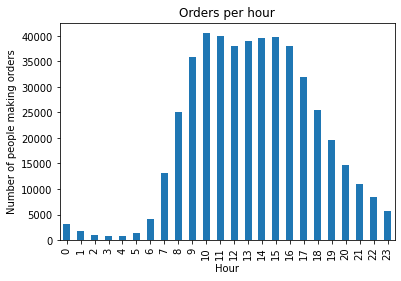

In [44]:
orders_by_hour = instacart_orders.groupby('order_hour_of_day')['user_id'].count()

orders_by_hour.plot(x='order_hour_of_day',
                   y='user_id', 
                   title='Orders per hour', 
                   kind='bar', 
                   xlabel= 'Hour', 
                   ylabel= 'Number of people making orders')


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Gracias al gráfico se puede notar cómo es más común que los usuarios hagan pedidos en las horas de la tarde, desde de las 9 a.m. a las 5 p.m. es el horario donde más actividad hay en la plataforma. 

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:title={'center':'Orders per day'}, xlabel='Day of the week', ylabel='Number of people making orders'>

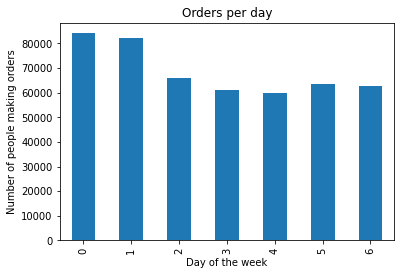

In [45]:
orders_by_day = instacart_orders.groupby('order_dow')['user_id'].count()

orders_by_day.plot(x='order_dow',
                   y='user_id', 
                   title='Orders per day', 
                   kind='bar', 
                   xlabel= 'Day of the week',
                   ylabel= 'Number of people making orders')


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Según los datos y la gráfica, es posible observar que la mayoría de usuarios prefieren hacer sus pedidos los días domingo y lunes; y a medida que avanza la semana los pedidos disminuyen. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:title={'center':'Days that people wait to reorder'}, xlabel='Number of days', ylabel='Number of people making orders'>

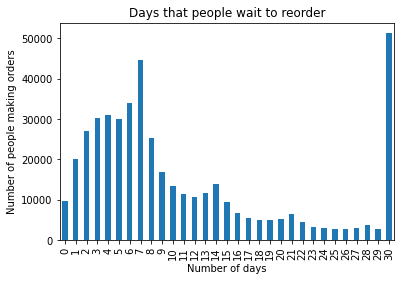

In [46]:
time_between_orders = instacart_orders.groupby('days_since_prior_order')['user_id'].count()

time_between_orders.plot(x='days_since_prior_order',
                   y='user_id', 
                   title='Days that people wait to reorder', 
                   kind='bar', 
                   xlabel= 'Number of days',
                   ylabel= 'Number of people making orders')

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
La gráfica evidencia claramente que la mayoría de usuarios vuelve a ordenar productos por la plataforma después de ocho días o después de un mes, siendo lo más común que esperen 30 días para hacer otro pedido. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [47]:
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()

saturday_orders = instacart_orders[instacart_orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

wed_and_sat_orders = pd.concat([wednesday_orders, saturday_orders], axis = 'columns')
wed_and_sat_orders.columns = ['wednesday_orders', 'saturday_orders']

print(wed_and_sat_orders)

    wednesday_orders  saturday_orders
0                373              464
1                215              254
2                106              177
3                101              125
4                108              118
5                170              161
6                643              451
7               1732             1619
8               3125             3246
9               4490             4311
10              5026             4919
11              5004             5116
12              4688             5132
13              4674             5323
14              4774             5375
15              5163             5188
16              4976             5029
17              4175             4295
18              3463             3338
19              2652             2610
20              1917             1847
21              1450             1473
22              1154             1185
23               718              893


<AxesSubplot:title={'center':'Orders per hour on Wednesdays and Saturdays'}, xlabel='Hour', ylabel='Orders'>

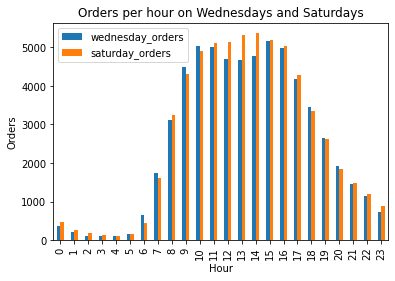

In [48]:
wed_and_sat_orders.plot(kind= 'bar',
                        xlabel='Hour',
                        ylabel='Orders',
                        title= 'Orders per hour on Wednesdays and Saturdays'
                       )

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Algunas diferencias:
    - En la mayoría de los casos, los pedidos de los sábados son más abundantes que los de los miércoles. 
    - 6 a.m. y p.m. al igual que 7 a.m. y p.m. son horarios que en comparación con los sábados, los miércoles son más fuertes en pedidos. A estos se les puede sumar los siguientes horarios: 9 a.m., 10 a.m. y 8 p.m.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [49]:
orders_per_client = instacart_orders['order_number'].value_counts().sort_index()

print(orders_per_client)

1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: order_number, Length: 100, dtype: Int64


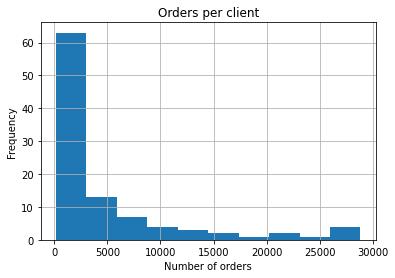

In [50]:
orders_per_client.hist()

plt.xlabel('Number of orders')
plt.ylabel('Frequency')
plt.title('Orders per client')
           
plt.show()

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Según la gráfica, es mucho más común en los usuarios que ordenen entre uno y cuatro artículos, a partir del quinto artículo se observa un decrecimiento, es decir, menos personas piden 5 artículos o más.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [51]:
#Primero uní dos dataframes que contenían la información necesaria para identificar los productos 
# más pedidos ('order_products' y 'products')

products_df = order_products.merge(products, on = 'product_id')

display(products_df.head())

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1


In [52]:
#Luego agrupé el dataframe combinado, hice un conteo de los productos por nombre e identificación
# y los organicé de manera descendente para que los 'order_id' más repetidos se mostraran primero. 

most_popular_products = products_df.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending = False)

most_popular_products.head(20)

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,66050,66050,66050,66050,66050
13176,BAG OF ORGANIC BANANAS,53297,53297,53297,53297,53297
21137,ORGANIC STRAWBERRIES,37039,37039,37039,37039,37039
21903,ORGANIC BABY SPINACH,33971,33971,33971,33971,33971
47209,ORGANIC HASS AVOCADO,29773,29773,29773,29773,29773
47766,ORGANIC AVOCADO,24689,24689,24689,24689,24689
47626,LARGE LEMON,21495,21495,21495,21495,21495
16797,STRAWBERRIES,20018,20018,20018,20018,20018
26209,LIMES,19690,19690,19690,19690,19690


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Los artículos más pedidos son, por lo general, orgánicos y frutas o verduras. 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [53]:
items_per_order = order_products.groupby('order_id')['product_id'].count()

print(items_per_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


In [54]:
histogram_values = items_per_order.value_counts().sort_index()

print(histogram_values)

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64


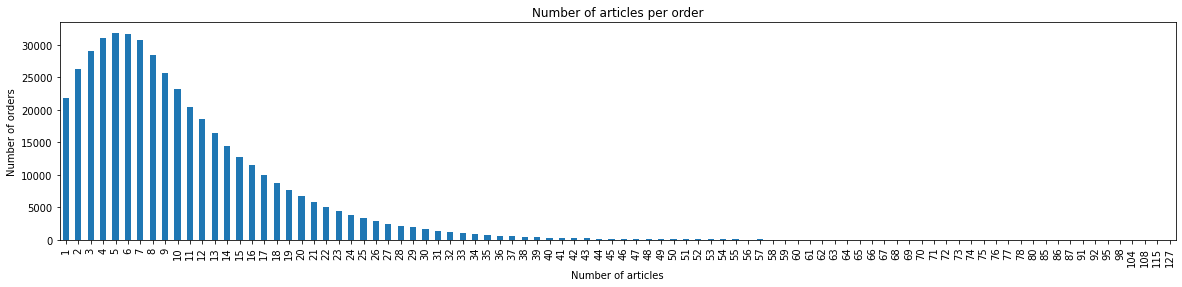

In [55]:
histogram_values.plot(kind = 'bar', 
                      title = 'Number of articles per order',
                      xlabel = 'Number of articles', 
                      ylabel = 'Number of orders',
                      figsize=[20, 4]
                      )

plt.show()

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Normalmente, los pedidos que hacen los usuarios incluyen entre uno y once artículos, siendo más comunes los pedidos de cinco y seis artículos. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [56]:
products_reorders = order_products[order_products['reordered'] == 1]

In [57]:
reorders_and_products = products_reorders.merge(products, on = 'product_id')
display(reorders_and_products.head())

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1,1,BAG OF ICE,37,1
1,761899,1560,2,1,BAG OF ICE,37,1
2,1388514,1560,8,1,BAG OF ICE,37,1
3,2629631,1560,1,1,BAG OF ICE,37,1
4,866921,1560,6,1,BAG OF ICE,37,1


In [58]:
most_frequent_reorders = reorders_and_products.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending = False)

display(most_frequent_reorders.head(20))

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,55763,55763,55763,55763,55763
13176,BAG OF ORGANIC BANANAS,44450,44450,44450,44450,44450
21137,ORGANIC STRAWBERRIES,28639,28639,28639,28639,28639
21903,ORGANIC BABY SPINACH,26233,26233,26233,26233,26233
47209,ORGANIC HASS AVOCADO,23629,23629,23629,23629,23629
47766,ORGANIC AVOCADO,18743,18743,18743,18743,18743
27845,ORGANIC WHOLE MILK,16251,16251,16251,16251,16251
47626,LARGE LEMON,15044,15044,15044,15044,15044
27966,ORGANIC RASPBERRIES,14748,14748,14748,14748,14748


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Como era de esperar, la mayoría de artículos más pedidos coinciden con aquellos que los clientes vuelven a comprar, es decir, frutas y/o verduras, varias en su modalidad orgánica.  

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [59]:
merged_products = order_products.merge(products, on = 'product_id')

display(merged_products.head())

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1


In [60]:
reorder_products = merged_products.groupby('product_id')['reordered'].mean()
print(reorder_products.head(10))

product_id
1     0.564286
2     0.000000
3     0.738095
4     0.510204
7     0.500000
8     0.315789
9     0.761905
10    0.448071
11    0.625000
12    0.390244
Name: reordered, dtype: float64


In [61]:
reorder_products.sort_values(ascending = False).reset_index()

,product_id,reordered
0,14721,1.0
1,20949,1.0
2,6723,1.0
3,6732,1.0
4,45088,1.0
...,...,...
45568,10485,0.0
45569,37690,0.0
45570,10484,0.0
45571,10474,0.0


<AxesSubplot:title={'center':"Reorders' proportion"}, ylabel='Frequency'>

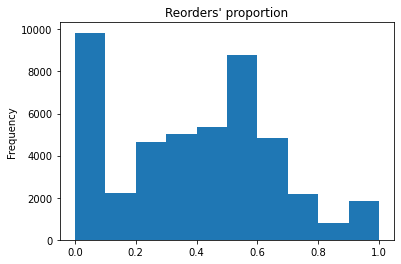

In [62]:
reorder_products.plot(kind='hist', title = "Reorders' proportion")

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Tras sacar los promedios, se puede observar que hay diversos resultados según el producto,pero los más comunes son que no se reordenen, o que se reordenen la mitad de las veces o en un 0,6.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [63]:
df_merge = order_products.merge(instacart_orders, on = 'order_id')

display(df_merge.head())

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8
1,2141543,31869,15,1,58454,25,0,15,8
2,2141543,30233,9,1,58454,25,0,15,8
3,2141543,27966,20,1,58454,25,0,15,8
4,2141543,13176,2,1,58454,25,0,15,8


In [64]:
reorder_by_client = df_merge.groupby('user_id')['reordered'].mean()
reorder_by_client.sort_values(ascending = False).reset_index().round(2)

,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


<AxesSubplot:title={'center':"Products' proportion"}, ylabel='Frequency'>

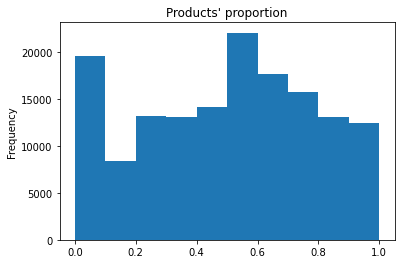

In [68]:
reorder_by_client.plot(kind='hist', title = "Products' proportion")

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Según la gráfica, en un poco más del 50 % de los casos, los clientes vuelven a pedir los mismos artículos, seguido por la opción de que no se vuelven a pedir los productos. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [66]:
articles_in_cart = order_products.merge(products)
articles_in_cart = articles_in_cart[articles_in_cart['add_to_cart_order'] == 1]

display(articles_in_cart)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
6,1463503,11440,1,0,CHICKEN BREAST TENDERS BREADED,129,1
17,2201430,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
21,1036054,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
50,3008652,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
62,2946144,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4544972,1518168,16952,1,0,SENSITIVE NIGHT CREAM,73,11
4544977,1776450,21507,1,0,GLUTEN FREE ALL-PURPOSE RICE FLOUR BLEND,17,13
4544995,2333206,25467,1,0,MADAGASCAR PURE VANILLA,17,13
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [67]:
top_articles_in_cart = articles_in_cart.groupby(['product_id', 'product_name']).count().sort_values(['add_to_cart_order'], ascending = False)

display(top_articles_in_cart.head(20))



,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,15562,15562,15562,15562,15562
13176,BAG OF ORGANIC BANANAS,11026,11026,11026,11026,11026
27845,ORGANIC WHOLE MILK,4363,4363,4363,4363,4363
21137,ORGANIC STRAWBERRIES,3946,3946,3946,3946,3946
47209,ORGANIC HASS AVOCADO,3390,3390,3390,3390,3390
21903,ORGANIC BABY SPINACH,3336,3336,3336,3336,3336
47766,ORGANIC AVOCADO,3044,3044,3044,3044,3044
19660,SPRING WATER,2336,2336,2336,2336,2336
16797,STRAWBERRIES,2308,2308,2308,2308,2308


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
Como era de esperarse, los primeros productos que los clientes agregan al carrito, coinciden en muchas ocasiones con los artículos más comprados, es decir: frutas y/o verduras, algunas veces en su modalidad orgánica. 

### Conclusion general del proyecto:

<div class="alert alert-block alert-info">
    
**Pasos efectuados para el preprocesamiento de datos:** 
1. Revisar si hay valores duplicados y eliminarlos.
2. Revisar los valores ausentes y eliminarlos.
3. Verificar y corregir los tipos de datos.

**Algunos errores o valores ausentes dignos de mencionar:** 
- Todos los pedidos duplicados (106 en total) están registrados el miércoles a las 2 a.m. Al no ser una muestra significativa, y que además cuenta con patrones de fecha y hora claros, se pudo concluir que se trataba de un caso aislado, el cual pudo arreglarse eliminando los valores repetidos. 
- En la base de datos ‘Products’ se encontraron más de mil valores ausentes, es decir, de nombres de productos cuyos nombres no estaban registrados. Más adelante se confirmó que todos los productos sin nombre hacían parte del pasillo 100 y del departamento número 21. Para solucionarlo se etiquetaron o nombraron dichos productos como ‘Desconocidos’.
- Cuando los clientes agregaban más de 64 productos al carrito, la compra no se registraba correctamente. Para solucionarlo, se buscó hacer más evidente el error en el sistema, para que este no pase desapercibido cuando se vean 999 pedidos según la orden.

**Patrones de compra:**
- **Desde de las 9 a.m. a las 5 p.m. es el horario donde más actividad hay en la plataforma.** Gráfica [7.2: Orders per hour]
- **La mayoría de usuarios prefieren hacer sus pedidos los días domingo y lunes.** Gráfica [7.3: Orders per day]
- **La mayoría de usuarios vuelve a ordenar productos por la plataforma después de ocho días o después de un mes,** siendo lo más común que esperen 30 días para hacer otro pedido. Gráfica [7.4: Days that people wait to reorder]
- **Diferencias de patrones de compra entre miércoles y sábados:** 
    - En la mayoría de los casos, los pedidos de los sábados son más abundantes que los de los miércoles. 
    - 6 a.m. y p.m. al igual que 7 a.m. y p.m. son horarios que en comparación con los sábados, los miércoles son más fuertes en pedidos. A estos se les puede sumar los siguientes horarios: 9 a.m., 10 a.m. y 8 p.m.
- Los pedidos que hacen los usuarios incluyen entre uno y once artículos, **siendo más comunes los pedidos de cinco y seis artículos.**
- **Artículos más pedidos:** estos son, por lo general, orgánicos y frutas o verduras.
- **La mayoría de artículos más pedidos coinciden con aquellos que los clientes vuelven a comprar**, es decir, frutas y/o verduras, varias en su modalidad orgánica.
- Un poco más del 50 % de los casos, los clientes vuelven a pedir los mismos artículos, seguido por la opción de que no se vuelven a pedir los productos.

**Conclusiones finales y sugerencias para Instacart:** 
- En general, las bases de datos se encontraban en un buen estado, me refiero a que se tomaron en cuenta buenas prácticas de escritura y procesamiento de datos, salvo el error con 'add_to_cart_order', todo funcionaba bien y estaba en un formato apropiado.
- Para promover la venta de ciertos productos o quizá venta y compra en días y horarios de baja demanda, se recomienda publicitar descuentos por fechas o quizá bundles de productos que se venden más, junto a productos de baja demanda; ejemplos: jueves de descuentos…“Implementa en casa los jueves de avocado toast vegano y obtén un descuento al comprar juntos los EGG REPLACER POWDER y ORGANIC HASS AVOCADO”. Estas promociones se pueden mostrar a los usuarios durante los horarios de más flujo de clientes en la plataforma, es decir, de 9 a.m. a las 5 p.m.